In [37]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [38]:
df=pd.read_csv('Ice_cream selling data.csv')
df

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531
5,-3.455712,30.001138
6,-3.108440,22.635401
7,-3.081303,25.365022
8,-2.672461,19.226970
9,-2.652287,20.279679


[ 0.         -0.83007228  1.77619762]
3.0979122269018227
13.62254956248346
0.9344048915319731
[28.19678508]


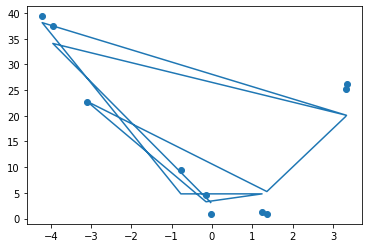

In [39]:
x=df[['Temperature (°C)']]
y=df['Ice Cream Sales (units)']#target column,dependent variable
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5) #
# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_train)
model=LinearRegression()
model.fit(x_poly,y_train)
y_pred=model.predict(poly.fit_transform(x_test))
print(model.coef_)
print(model.intercept_)
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))
y_pred1=model.predict(poly.fit_transform([[4]]))
print(y_pred1)
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred)
plt.show()

mse: 196.81907644190096
mse: 13.62254956248346
mse: 14.030256728123973
mse: 12.24546027788018
mse: 11.829159078126905
mse: 11.388757221121056
mse: 8.435867302258782
mse: 8.71552345668927
mse: 10.233364970352007
mse: 9.883209491034442
mse: 9.289548237749873
max 0.9593797307783355


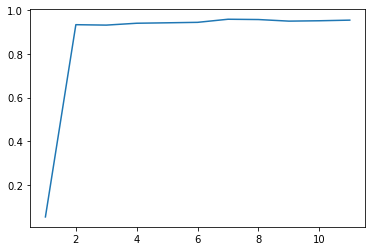

In [40]:
x=df[['Temperature (°C)']]
y=df['Ice Cream Sales (units)']#target column,dependent variable
mr=[]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5) #
for i in range (1,12):
    poly=PolynomialFeatures(degree=i)
    x_poly=poly.fit_transform(x_train)
    model=LinearRegression()
    model.fit(x_poly,y_train)
    y_pred=model.predict(poly.fit_transform(x_test))
    print('mse:',mean_squared_error(y_test,y_pred))
    mr+=[r2_score(y_test,y_pred)]
print('max',max(mr))
# lt.scatter(x_test,y_test)
x=range(1,12)
plt.plot(x,mr)
plt.show()

In [41]:
# out of sal
df=pd.read_csv('wine_data.csv',header=None,usecols=[0,1,2])
df

,0,1,2
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [48]:
df.columns=['class_label','Alchohol','malic_acid']

In [49]:
df

,class_label,Alchohol,malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<AxesSubplot:xlabel='Alchohol', ylabel='Density'>

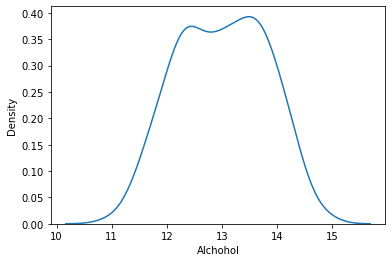

In [50]:
import seaborn as sns
sns.kdeplot(df['Alchohol'])

<AxesSubplot:xlabel='malic_acid', ylabel='Density'>

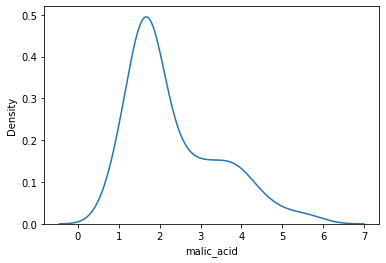

In [51]:
sns.kdeplot(df['malic_acid'])

In [54]:
df.class_label.nunique()

3

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alchohol', ylabel='malic_acid'>

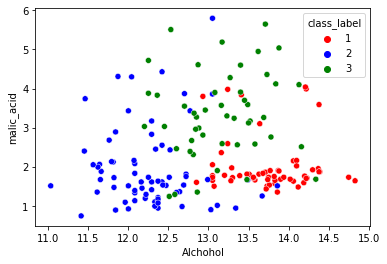

In [60]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(df['Alchohol'],df['malic_acid'],hue=df['class_label'],palette=color_dict)

In [62]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('class_label',axis=1),df['class_label'],test_size=0.3,random_state=0)

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(x_train)
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [71]:
x_test_scaled.describe()

,Alchohol,malic_acid
count,54.000000,54.000000
mean,0.540571,0.281007
std,0.226251,0.225487
min,0.102151,-0.031513
25%,0.358199,0.148109
50%,0.543011,0.184874
75%,0.723118,0.375525
max,1.021505,1.031513


In [70]:
x_train_scaled.describe()

,Alchohol,malic_acid
count,124.000000,124.000000
mean,0.525017,0.313805
std,0.215414,0.238802
min,0.000000,0.000000
25%,0.358199,0.150735
50%,0.540323,0.209034
75%,0.701613,0.495273
max,1.000000,1.000000


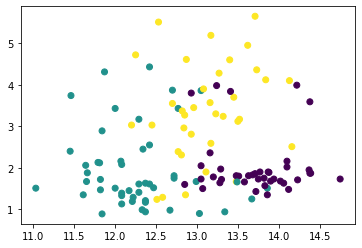

In [74]:
plt.scatter(x_train['Alchohol'],x_train['malic_acid'],c=y_train)

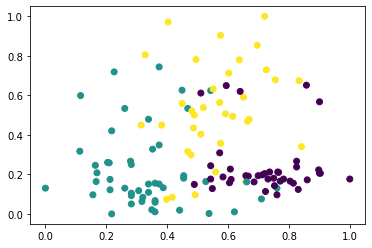

In [75]:
plt.scatter(x_train_scaled['Alchohol'],x_train_scaled['malic_acid'],c=y_train)

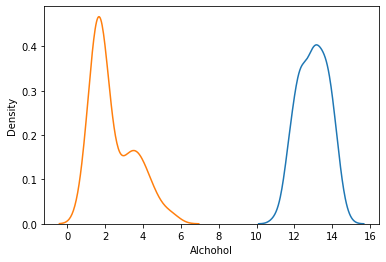

In [77]:
sns.kdeplot(x_train['Alchohol'])
sns.kdeplot(x_train['malic_acid'])
plt.show()

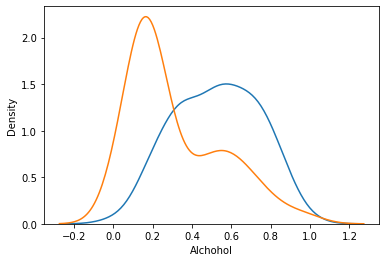

In [78]:
sns.kdeplot(x_train_scaled['Alchohol'])
sns.kdeplot(x_train_scaled['malic_acid'])
plt.show()

In [79]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [80]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

[]

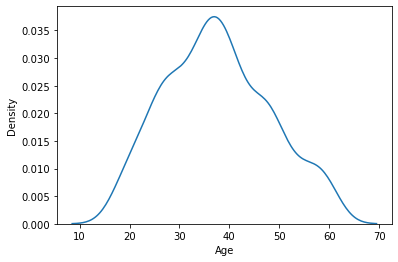

In [82]:
sns.kdeplot(df['Age'])
plt.plot()

[]

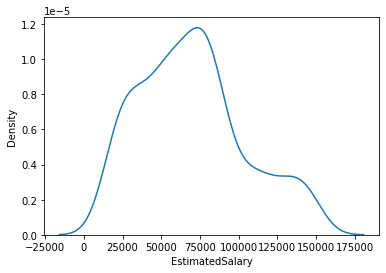

In [83]:
sns.kdeplot(df['EstimatedSalary'])
plt.plot()

In [86]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [88]:
df.drop(columns=['User ID','Age'],inplace=True)
df

,Gender,EstimatedSalary,Purchased
0,Male,19000,0
1,Male,20000,0
2,Female,43000,0
3,Female,57000,0
4,Male,76000,0
...,...,...,...
395,Female,41000,1
396,Male,23000,1
397,Female,20000,1
398,Male,33000,0


In [90]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.2,random_state=0)